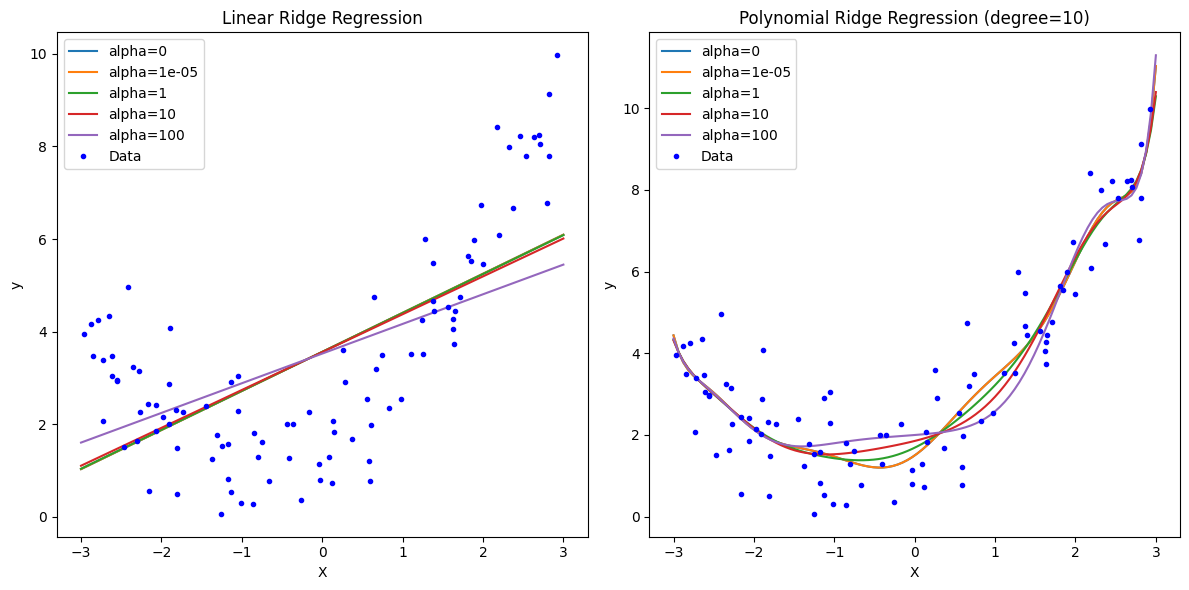

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Generate synthetic dataset
np.random.seed(42)  # Set seed for reproducibility
m = 100  # Number of samples
X = 6 * np.random.rand(m, 1) - 3  # Generate input features uniformly in range [-3, 3]
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # Generate target with quadratic pattern and noise

# Generate new data points for plotting predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# Ridge regularization strengths to compare
alphas = [0, 1e-5, 1, 10, 100]  # List of different alpha values (regularization strength)

# Plotting setup for side-by-side comparison
plt.figure(figsize=(12, 6))

# Linear Ridge models (left plot)
plt.subplot(1, 2, 1)
for alpha in alphas:
    # Create and train a linear Ridge regression model for each alpha
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X, y)
    y_predict = ridge_reg.predict(X_new)  # Predict over new inputs
    plt.plot(X_new, y_predict, label=f"alpha={alpha}")  # Plot the predictions

plt.plot(X, y, "b.", label="Data")  # Plot original data points
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Ridge Regression")  # Title for the linear model plot
plt.legend(loc="upper left")  # Display legend

# Polynomial Ridge models (right plot)
plt.subplot(1, 2, 2)
for alpha in alphas:
    # Create a pipeline with polynomial features and Ridge regression
    polynomial_ridge = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),  # Add polynomial features
        ("ridge_reg", Ridge(alpha=alpha, solver="cholesky"))  # Apply Ridge regression
    ])
    polynomial_ridge.fit(X, y)
    y_predict = polynomial_ridge.predict(X_new)  # Predict over new inputs
    plt.plot(X_new, y_predict, label=f"alpha={alpha}")  # Plot predictions

plt.plot(X, y, "b.", label="Data")  # Plot original data points
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Ridge Regression (degree=10)")  # Title for polynomial model plot
plt.legend(loc="upper left")  # Display legend

plt.tight_layout()  # Adjust subplots to fit nicely
plt.show()  # Display the full figure